In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
from sklearn.utils import resample
#from bioinfokit.analys import stat, get_data 

In [101]:
df = pd.read_csv('data/churn_raw_data.csv', index_col=[0])

In [102]:
df

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [4]:
df.head().T

,1,2,3,4,5
CaseOrder,1,2,3,4,5
Customer_id,K409198,S120509,K191035,D90850,K662701
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574
City,Point Baker,West Branch,Yamhill,Del Mar,Needville
State,AK,MI,OR,CA,TX
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend
Zip,99927,48661,97148,92014,77461
Lat,56.251,44.32893,45.35589,32.96687,29.38012
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673
Population,38,10446,3735,13863,11352


In [5]:
df.Children.isna()

1         True
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998      True
9999     False
10000    False
Name: Children, Length: 10000, dtype: bool

In [6]:
Children = df.Children.dropna()

In [7]:
len(Children)

7505

In [8]:
Children.median()

1.0

In [9]:
df.Children.value_counts(normalize=True, dropna=False)

NaN     0.2495
0.0     0.1919
1.0     0.1874
2.0     0.1100
3.0     0.1096
4.0     0.0769
5.0     0.0161
8.0     0.0158
7.0     0.0149
6.0     0.0135
10.0    0.0074
9.0     0.0070
Name: Children, dtype: float64

In [10]:
sample_mean_250 = pd.DataFrame({
    'Children': [Children.sample(n=250).mean() for _ in range(1000)],
    'type': 'mean of 250'
})
print(sample_mean_250.median(), sample_mean_250.mean())

Children    2.096
dtype: float64 Children    2.092896
dtype: float64


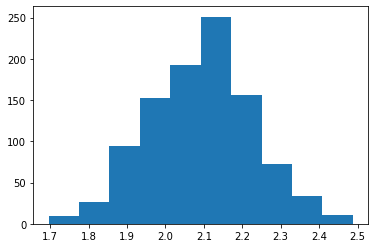

<Figure size 432x288 with 0 Axes>

In [11]:
plt.hist(x=sample_mean_250.Children)
plt.show()
plt.tight_layout()

In [12]:
sample_mean_350 = pd.DataFrame({
    'Children': [Children.sample(n=350).mean() for _ in range(1000)],
    'type': 'mean of 350'
})

print(sample_mean_350.median(), sample_mean_350.mean())

Children    2.1
dtype: float64 Children    2.098551
dtype: float64


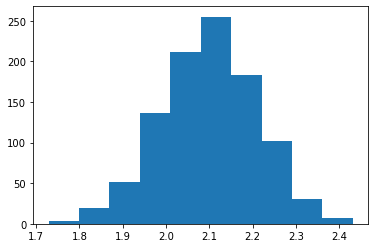

<Figure size 432x288 with 0 Axes>

In [13]:
plt.hist(x=sample_mean_350.Children)
plt.show()
plt.tight_layout()

In [14]:
sample_mean_500 = pd.DataFrame({
    'Children': [Children.sample(n=500).mean() for _ in range(1000)],
    'type': 'mean of 500'
})

sample_mean_500.median()

Children    2.106
dtype: float64

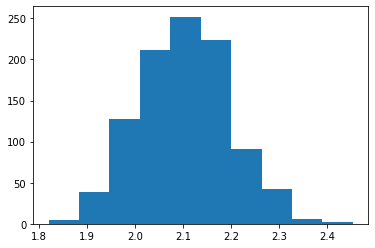

<Figure size 432x288 with 0 Axes>

In [15]:
plt.hist(x=sample_mean_500.Children)
plt.show()
plt.tight_layout()

In [16]:
concat_df = pd.concat([sample_mean_250, sample_mean_350, sample_mean_500])

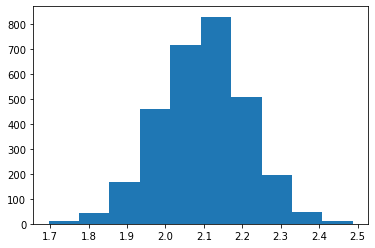

<Figure size 432x288 with 0 Axes>

In [17]:
plt.hist(x=concat_df.Children)
plt.show()
plt.tight_layout()

In [18]:
df.Children.mean(), df.Children.median()

(2.095936042638241, 1.0)

# I will resample the columns (I am using the central theorem limit technique)

In [19]:
results = []

for nrepeat in range(1000):
    sample = resample(Children)
    results.append(sample.median())

In [29]:
len(results)

1000

In [31]:
type(results)

list

In [34]:
results = pd.Series(results)
results.mean()

1.18

In [35]:
results.median()

1.0

In [39]:
print(Children.mean(), Children.median())

2.095936042638241 1.0


(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

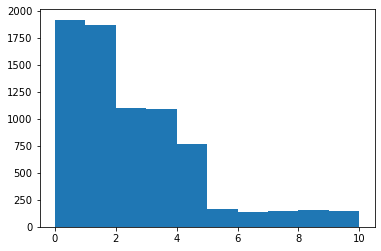

In [40]:
plt.hist(x=Children)

(array([820.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

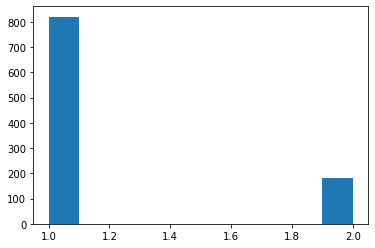

In [41]:
plt.hist(x=results)

In [21]:
df.Age.isna().sum()

2475

In [22]:
df.Gender.value_counts()

Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64

In [24]:
len(df.loc[(df['Gender'] == 'Prefer not to answer') &
      df.Age.isnull()])

55

In [26]:
len(df.loc[(df['Gender'] == 'Male') &
      df.Age.isnull()])

1201

In [28]:
len(df.loc[(df['Gender'] == 'Female') &
      df.Age.isnull()])

1219

In [37]:
len(df.loc[(df['Age'] >= 40) &
           (df['Age'] < 50)])

1053

In [38]:
len(df.loc[(df['Age'] >= 50) &
           (df['Age'] < 60)])

1033

In [39]:
len(df.loc[(df['Age'] >= 60) &
           (df['Age'] < 70)])

1043

In [40]:
len(df.loc[(df['Age'] >= 70) &
           (df['Age'] < 89)])

1977

In [47]:
df.loc[(df.Age.isnull()) &
      (df.Churn == 'Yes')].mean()

CaseOrder                3100.133132
Zip                     49882.963691
Lat                        38.813403
Lng                       -90.688813
Population               9284.071104
Children                    2.008230
Age                              NaN
Income                  40775.684940
Outage_sec_perweek         11.473141
Email                      12.031770
Contacts                    0.971256
Yearly_equip_failure        0.366112
Tenure                     13.829832
MonthlyCharge             200.855501
Bandwidth_GB_Year        1835.335863
item1                       3.443268
item2                       3.464448
item3                       3.419062
item4                       3.479576
item5                       3.481089
item6                       3.511346
item7                       3.503782
item8                       3.568835
dtype: float64

In [49]:
df.loc[(df.Age.isnull()) &
      (df.Churn == 'No')].mean()

CaseOrder                5719.432194
Zip                     49037.740353
Lat                        38.661945
Lng                       -90.664103
Population               9627.342889
Children                    2.133627
Age                              NaN
Income                  39378.130773
Outage_sec_perweek         11.501582
Email                      11.952040
Contacts                    0.948732
Yearly_equip_failure        0.412348
Tenure                     42.739874
MonthlyCharge             163.829761
Bandwidth_GB_Year        4022.337419
item1                       3.499449
item2                       3.533076
item3                       3.505513
item4                       3.512128
item5                       3.485667
item6                       3.502205
item7                       3.531422
item8                       3.511025
dtype: float64

In [50]:
df.loc[(df.Age.notnull()) &
      (df.Churn == 'Yes')].mean()

CaseOrder                3010.229261
Zip                     49411.683258
Lat                        38.852254
Lng                       -90.968457
Population               9640.322775
Children                    2.140761
Age                        53.521368
Income                  40642.061560
Outage_sec_perweek         11.246508
Email                      12.093514
Contacts                    1.020613
Yearly_equip_failure        0.386124
Tenure                     13.016036
MonthlyCharge             200.511866
Bandwidth_GB_Year        1766.687013
item1                       3.489693
item2                       3.488185
item3                       3.484163
item4                       3.495726
item5                       3.465058
item6                       3.495224
item7                       3.491202
item8                       3.484163
dtype: float64

In [51]:
df.loc[(df.Age.notnull()) &
      (df.Churn == 'No')].mean()

CaseOrder                5706.903179
Zip                     49011.246026
Lat                        38.748213
Lng                       -90.765735
Population               9897.082912
Children                    2.077682
Age                        53.187500
Income                  39770.486395
Outage_sec_perweek         11.508785
Email                      12.007225
Contacts                    1.002348
Yearly_equip_failure        0.401373
Tenure                     42.082078
MonthlyCharge             164.738489
Bandwidth_GB_Year        3962.222951
item1                       3.494039
item2                       3.506864
item3                       3.490065
item4                       3.495484
item5                       3.506684
item6                       3.494762
item7                       3.509574
item8                       3.485910
dtype: float64

In [58]:
def tenure_rel_age(key1,key2):
    return df.loc[(df['Age'] >= key1) &
          (df['Age'] < key2)]['Tenure'].mean()

In [62]:
tenure_rel_age(50,60)

33.38226813732975

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='MonthlyCharge'>

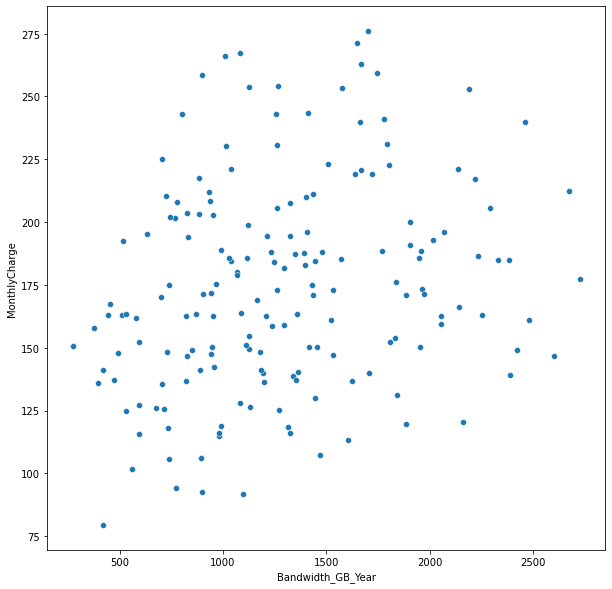

In [144]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y=df['MonthlyCharge'][:200], x=df['Bandwidth_GB_Year'][:200],
               ax=ax)

In [103]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            if key == 'Age':
                # adding a binary column T/F
                df[key + 'Is_missing'] = pd.isnull(values)
                # adding Na values with the median since it is more robust
                df[key] = values.fillna(values.median())

In [105]:
df.Age

1        68.0
2        27.0
3        50.0
4        48.0
5        83.0
         ... 
9996     53.0
9997     48.0
9998     53.0
9999     39.0
10000    28.0
Name: Age, Length: 10000, dtype: float64

In [93]:
df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                        0
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [82]:
trim_mean(df['Age'], 0.1)

nan

In [83]:
Age = df.Age

In [85]:
Age.dropna(inplace=True)

In [89]:
trim_mean(Age, 0.20)

53.27043189368771

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

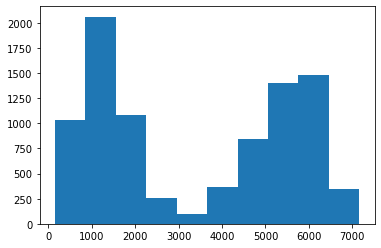

In [94]:
plt.hist(df.Bandwidth_GB_Year)

In [128]:
band = df.loc[(df.Bandwidth_GB_Year > 4000) &
      (df.Bandwidth_GB_Year <= 7000)][['Age', 'Children', 'Bandwidth_GB_Year',
                                      'Techie', 'Phone']]

In [129]:
band.Age.median()

53.0

In [130]:
band.loc[(band['Age'] >=  20) & 
         (band['Age'] < 30)].mean()

Age                    24.600000
Children                2.253049
Bandwidth_GB_Year    5618.876738
dtype: float64

In [131]:
band.loc[(band['Age'] >=  30) & 
         (band['Age'] < 40)].mean()

Age                    34.485523
Children                2.194118
Bandwidth_GB_Year    5552.523788
dtype: float64

In [132]:
band.loc[(band['Age'] >=  40) & 
         (band['Age'] < 50)].mean()

Age                    44.449339
Children                2.138418
Bandwidth_GB_Year    5592.025436
dtype: float64

In [133]:
band.loc[(band['Age'] >=  50) & 
         (band['Age'] < 60)].mean()

Age                    53.373850
Children                2.066313
Bandwidth_GB_Year    5538.711131
dtype: float64

In [147]:
sample_of_band = pd.DataFrame({
    'Bandwidth': [df.Bandwidth_GB_Year.sample(frac=.5).mean() for _ in range(1000)],
    'type': "frac5"
})

In [151]:
sample_of_band.median()

Bandwidth    3399.029431
dtype: float64

(array([  6.,  24.,  73., 139., 230., 212., 186.,  87.,  36.,   7.]),
 array([3327.54370795, 3341.39221495, 3355.24072195, 3369.08922895,
        3382.93773595, 3396.78624295, 3410.63474995, 3424.48325695,
        3438.33176395, 3452.18027095, 3466.02877795]),
 <BarContainer object of 10 artists>)

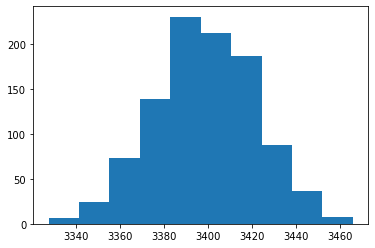

In [149]:
plt.hist(sample_of_band.Bandwidth)

In [ ]:
#  for key, values in df.items():
#     if pd.api.types.is_numeric_dtype(values):
#         if pd.isnull(values).sum():
#             if key == 'Age':
#                 # adding a binary column T/F
#                 df[key + 'Is_missing'] = pd.isnull(values)
#                 # adding Na values with the median since it is more robust
#                 df[key] = values.fillna(values.median())

In [155]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            if key == 'Bandwidth_GB_Year':
                # adding binary column
                df[key+'Is_missing'] = pd.isnull(values)
                #filling na values with band findings
                df[key] = values.fillna(value=3399.029431)

(array([ 704., 1828., 1246.,  531.,  140., 1105.,  292.,  565.,  971.,
        1368., 1043.,  207.]),
 array([ 155.5067148 ,  739.12965523, 1322.75259567, 1906.3755361 ,
        2489.99847653, 3073.62141697, 3657.2443574 , 4240.86729783,
        4824.49023827, 5408.1131787 , 5991.73611913, 6575.35905957,
        7158.982     ]),
 <BarContainer object of 12 artists>)

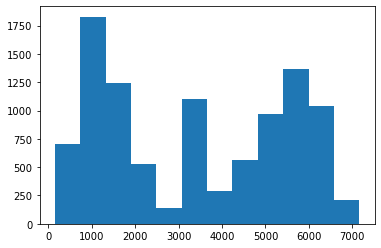

In [167]:
plt.hist(df.Bandwidth_GB_Year, bins=12)

In [169]:
df.Tenure.isna().sum()

931

In [172]:
df.Bandwidth_GB_YearIs_missing.value_counts(normalize=True)

False    0.8979
True     0.1021
Name: Bandwidth_GB_YearIs_missing, dtype: float64

In [178]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype:
        if pd.isnull(values).sum():
            if key == 'Tenure':
                df[key+'_is_missing'] = pd.isnull(values)

In [180]:
df['Tenure'].loc[df['Tenure'].isnull() &
      (df.Age < 30)] = 25.172522

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 30) &
       (df.Age < 40)] = 38.23

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 40) &
       (df.Age < 50)] = 28.23

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 50) &
       (df.Age < 60)] = 37.78

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 60) &
       (df.Age < 70)] = 40.96

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 70) &
       (df.Age < 80)] = 30.18

df["Tenure"].loc[df['Tenure'].isnull() &
      (df.Age >= 80) &
       (df.Age < 90)] = 36.44 

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value i

In [181]:
df.isna().sum()

CaseOrder                         0
Customer_id                       0
Interaction                       0
City                              0
State                             0
County                            0
Zip                               0
Lat                               0
Lng                               0
Population                        0
Area                              0
Timezone                          0
Job                               0
Children                       2495
Age                               0
Education                         0
Employment                        0
Income                         2490
Marital                           0
Gender                            0
Churn                             0
Outage_sec_perweek                0
Email                             0
Contacts                          0
Yearly_equip_failure              0
Techie                         2477
Contract                          0
Port_modem                  